In [1]:
import pandas as pd
import matplotlib as plot
import seaborn as sns

In [2]:
import pandas as pd
# 데이터 불러오기
customers = pd.read_csv('customer_hm.csv')
articles = pd.read_csv('articles_hm.csv')
transactions = pd.read_csv('transactions_hm.csv')

In [ ]:
# 각 데이터의 크기(행렬 개수) 확인
print(customers.shape)
print(articles.shape)
print(transactions.shape)

(1048575, 6)
(105542, 25)
(1048575, 5)


In [5]:
# 각 데이터의 컬럼 확인
print(customers.columns.tolist())
print(articles.columns.tolist())
print(transactions.columns.tolist())

['customer_id', 'FN', 'Active', 'club_member_status', 'fashion_news_frequency', 'age']
['article_id', 'product_code', 'prod_name', 'product_type_no', 'product_type_name', 'product_group_name', 'graphical_appearance_no', 'graphical_appearance_name', 'colour_group_code', 'colour_group_name', 'perceived_colour_value_id', 'perceived_colour_value_name', 'perceived_colour_master_id', 'perceived_colour_master_name', 'department_no', 'department_name', 'index_code', 'index_name', 'index_group_no', 'index_group_name', 'section_no', 'section_name', 'garment_group_no', 'garment_group_name', 'detail_desc']
['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id']


In [9]:
print(customers.head(3))
# print(articles.head())
# print(transactions.head())

                                         customer_id  FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...   0       0   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...   0       0   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   0       0   

  club_member_status fashion_news_frequency  age  
0             ACTIVE                   NONE   49  
1             ACTIVE                   NONE   25  
2             ACTIVE                   NONE   24  


In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   customer_id             1048575 non-null  object
 1   FN                      1048575 non-null  int64 
 2   Active                  1048575 non-null  int64 
 3   club_member_status      1048575 non-null  object
 4   fashion_news_frequency  1048574 non-null  object
 5   age                     1048575 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 48.0+ MB


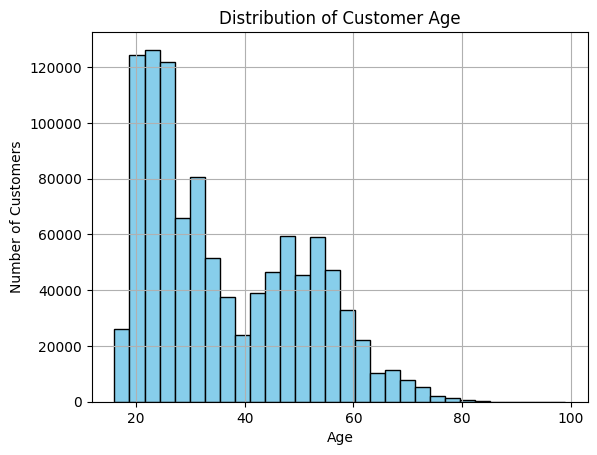

In [11]:
import matplotlib.pyplot as plt

# 단변량 수치형 변수의 분포 -> 히스토그램
customers['age'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

In [12]:
# 0) str -> datetime type 변경
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])

# 1) 날짜 범위
min_date = transactions['t_dat'].min()
max_date = transactions['t_dat'].max()

# 2) 총 거래 건수 & 고유 고객 수
n_tx = len(transactions)
n_cust = transactions['customer_id'].nunique() # nunique : 고유값의 수

# 3) 채널 비중(1=오프라인, 2=온라인)
transactions['channel'] = transactions['sales_channel_id'].map({1: 'offline(1)', 2: 'online(2)'}).fillna('other/unknown')
ch_counts = transactions['channel'].value_counts()
ch_share = (transactions['channel'].value_counts(normalize=True) * 100).round(2) # normalize=True : 값의 빈도(비율) 구하기

# 4) 출력
print("=== H&M 거래 요약 (2019년) ===")
print(f"- 날짜 범위: {min_date.date()}  →  {max_date.date()}")
print(f"- 총 거래 건수: {n_tx:,} 건")
print(f"- 고유 고객 수: {n_cust:,} 명")

print("\n[판매 채널별 거래 건수]")
print(ch_counts.to_string())

print("\n[판매 채널별 비중(%)]")
print(ch_share.to_string())

# 5) 간단 해석(온라인 > 오프라인 여부)
online = ch_counts.get('online(2)', 0)
offline = ch_counts.get('offline(1)', 0)
if online > offline:
    print("\n해석: 온라인(채널=2) 거래가 오프라인(채널=1)보다 많습니다 → 온라인 비중이 더 높음.")
elif online < offline:
    print("\n해석: 오프라인(채널=1) 거래가 온라인(채널=2)보다 많습니다.")
else:
    print("\n해석: 온라인과 오프라인 거래 건수가 동일합니다.")

=== H&M 거래 요약 (2019년) ===
- 날짜 범위: 2019-01-01  →  2019-12-31
- 총 거래 건수: 1,048,575 건
- 고유 고객 수: 458,235 명

[판매 채널별 거래 건수]
channel
online(2)     729192
offline(1)    319383

[판매 채널별 비중(%)]
channel
online(2)     69.54
offline(1)    30.46

해석: 온라인(채널=2) 거래가 오프라인(채널=1)보다 많습니다 → 온라인 비중이 더 높음.


In [13]:
plt.rcParams['font.family'] = 'Malgun Gothic' # For Windows # plt.rcParams['font.family'] = 'AppleGothic' # For MacOS %matplotlib inline